# Flipped Module Overview: Evaluation Measures and Validation
- Group: `Lab One 3`
    - Salissa Hernandez
    - Juan Carlos Dominguez
    - Leonardo Piedrahita
    - Brice Danvide

In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

# In Class Assignment Three
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class, to the best of your ability. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#LoadingKDD">Loading KDDCup Data</a>
* <a href="#kdd_eval">KDDCup Evaluation and Cross Validation</a>
* <a href="#data_snooping">More Cross Validation</a>
* <a href="#stats">Statistical Comparison</a>

**Before coming to class**, please make sure you have the latest version of `scikit-learn`. This notebook was created for version 0.18 and higher. 

________________________________________________________________________________________________________

<a id="LoadingKDD"></a>
<a href="#top">Back to Top</a>
## Loading KDDCup Data

Please run the following code to read in the "KDD Cup" dataset from sklearn's data loading module. It consists of examples of different simulated attacks for the 1998 DARPA Intrusion Detection System (IDS). 

This will load the data into the variable `ds`. `ds` is a `bunch` object with fields like `ds.data` and `ds.target`. The field `ds.data` is a numpy matrix of the continuous features in the dataset. **The object is not a pandas dataframe. It is a numpy matrix.** Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is an integer value we are trying to predict (i.e., a specific integer represents a specific person). Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [2]:
# fetch the dataset
from sklearn.datasets import  fetch_kddcup99
from sklearn import __version__ as sklearn_version

print('Sklearn Version:',sklearn_version)
ds =  fetch_kddcup99(subset='http')

Sklearn Version: 1.5.2


In [3]:
import numpy as np
# get some of the specifics of the dataset
X = ds.data
y = np.array(ds.target != b'normal.')
y = y.astype(int)

n_samples, n_features = X.shape
n_classes = len(np.unique(y))

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))

n_samples: 58725
n_features: 3
n_classes: 2


___
**Question 1:** How many instances are in the binary classification problem loaded above? How many instances are in each class? **Plot a pie chart or bar chart of the number of instances in each of the classes.**

Number of instances in each class: [56516  2209]


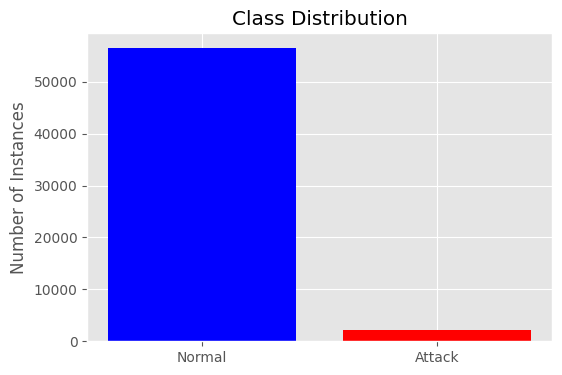

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#=== Fill in code below========
class_counts = np.bincount(y)

print(f'Number of instances in each class: {class_counts}')
# you might be interested in the functions:
#     np.bincount
#     plt.hist

plt.figure(figsize=(6,4))
plt.bar(['Normal', 'Attack'], class_counts, color=['blue', 'red'])
plt.title('Class Distribution')
plt.ylabel('Number of Instances')
plt.show()

<a id="kdd_eval"></a>
<a href="#top">Back to Top</a>
## KDDCup Evaluation and Cross Validation
Look at the following code that trains a model using 10-fold cross validation. You can also run this code to see the outputs. Then answer the question below it. 

You might also be interested in the following graphic: 
- https://en.wikipedia.org/wiki/Precision_and_recall#/media/File:Precisionrecall.svg

And the following:
$$ Precision = \frac{TP}{TP+FP} $$

and

$$ Recall = \frac{TP}{TP+FN} $$

and 

$$ F_1 = 2\cdot\frac{Precision\cdot Recall}{Precision + Recall} $$

and a new score that you might like to look at:

$$ F_{\beta} = (1+\beta^2)\cdot\frac{Precision\cdot Recall}{\beta^2\cdot Precision + Recall} $$

(0.9894891008174387, 1.0)

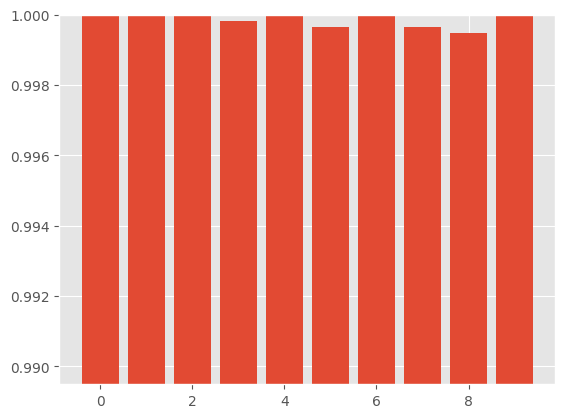

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

# select model
clf = LogisticRegression()
#select cross validation
cv = KFold(n_splits=10)
# select evaluation criteria
my_scorer = make_scorer(accuracy_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )
plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

____
**Question 2** Is the code above a proper separation of training and testing sets for the given dataset (i.e., using KFold)? Why or why not? 

## Why KFold May Not Be Ideal:

### 1. Class Imbalance Issue:
The dataset is heavily imbalanced, with 56,516 normal instances and only 2,209 attack instances. In KFold cross-validation, the data is split randomly into folds without paying attention to class distribution.  
As a result, some folds may end up with very few or no instances of the minority class (Attack). This can make the model’s performance appear better (high accuracy) but may fail to capture the behavior of the minority class.

### 2. Impact of Imbalance:
The classifier might overfit to the majority class and ignore the minority class. This would yield poor performance metrics (e.g., low recall for attacks) that do not reflect the true quality of the model.  
This can lead to misleading accuracy scores, as the model may achieve high accuracy by simply predicting the majority class for most instances.

## 3. Why StratifiedKFold is Better:
StratifiedKFold ensures that each fold contains approximately the same proportion of each class as the original dataset. This helps maintain the distribution of the classes across both the training and test sets.  
It provides more reliable performance estimates, particularly when dealing with imbalanced data, as every fold has a fair representation of both normal and attack instances.

___

**Question 3:** Is the evaluation metric chosen in the above code appropriate for the dataset (i.e., using accuracy)? Why or Why not?

## Why Accuracy is Misleading:

### 1. Class Imbalance Problem:
In the KDD Cup dataset, normal traffic (majority class) heavily outweighs attacks (minority class).  
If the model always predicts "normal" (majority class), it could achieve high accuracy without correctly identifying any attacks. For example:  
**Accuracy = 98%** might just mean the model correctly predicted almost all normal traffic but missed most attacks.

### 2. Imbalanced Data Pitfall:
Accuracy only measures the proportion of correctly predicted instances (both normal and attack), but doesn’t account for the importance of detecting the minority class (i.e., attacks).  
Intrusion detection systems prioritize catching attacks, and missing an attack (false negative) is far more critical than wrongly labeling normal traffic as an attack (false positive).

___

**Exercise 1:** If the code above is not a proper separation of the train or does not use the proper evaluation criteria, fix the code in the block below to use appropriate train/test separation and appropriate evaluation criterion (criteria). **Mark changes in the code with comments.**

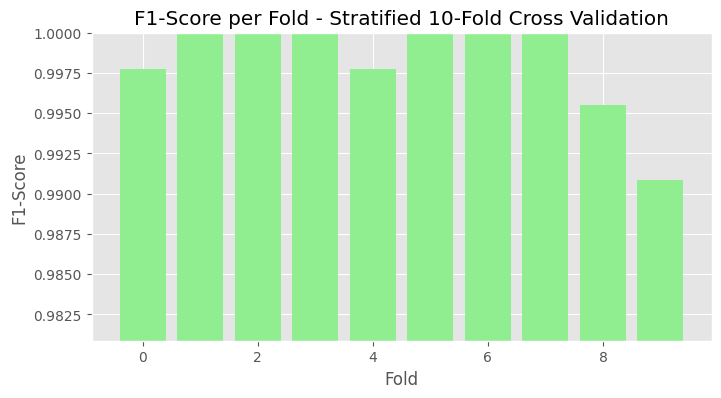

In [6]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

# these imports above might help you

#=====Write your code below here=================
# select model
clf = LogisticRegression(max_iter=1000) # add max iteration

#select cross validation
cv = StratifiedKFold(n_splits=10)

# Use F1-Score for evaluation criteria (Changed from accuracy_score to f1_score)
my_scorer = make_scorer(f1_score)

# run model training and cross-validation with proper train/test separation and F1 evaluation
per_fold_eval_criteria = cross_val_score(estimator=clf, X=X, y=y, cv=cv, scoring=my_scorer)

# plot the per-fold F1-score results
plt.figure(figsize=(8, 4))
plt.bar(range(len(per_fold_eval_criteria)), per_fold_eval_criteria, color='lightgreen')
plt.ylim([min(per_fold_eval_criteria) - 0.01, max(per_fold_eval_criteria)])
plt.title('F1-Score per Fold - Stratified 10-Fold Cross Validation')
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.show()

____
**Question 4**: Does the learning algorithm perform well based on the evaluation criteria? Why or why not, based on the way the system will be used?

## Why the Algorithm Performs Well:

### 1. High F1 Score (0.9809):
The F1 score is close to 1.0, indicating that the model achieves a good balance between precision and recall.  
This suggests that the model accurately identifies both attack and normal traffic with few false positives and false negatives.

### 2. Low False Positives (Type I Errors):
A high precision indicates that most predicted attacks are correct. This minimizes unnecessary alerts, which is crucial for intrusion detection systems to avoid alert fatigue.

### 3. Low False Negatives (Type II Errors):
A high recall means the model detects most actual attacks, reducing the chance of missing critical security breaches.

### Considerations for Intrusion Detection Systems (IDS):
While the mean F1 score is impressive, it is essential to consider the practical use case of the system:

1. **False Negatives (Missed Attacks) Are Critical:**  
  In an intrusion detection system, recall is particularly important because missing an attack (Type II error) can have severe consequences.  
  If the F1 score is high because of excellent precision but slightly lower recall, the system could still miss some attacks, which could be problematic in a real-world deployment.

2. **Trade-offs Between Precision and Recall:**  
  While the F1 score balances precision and recall, the specific use case (intrusion detection) might require a higher emphasis on recall to ensure that no attacks are missed.  
  A slightly lower precision (and hence more false positives) might be acceptable if it ensures that almost all attacks are detected.

3. **Evaluation on Real-World Data:**  
  The KDD dataset is a benchmark dataset, which may not fully reflect the complexity of real-world attack patterns. While the model performs well on this dataset, further testing on live data would be necessary to confirm its effectiveness.

___


<a id="data_snooping"></a>
<a href="#top">Back to Top</a>

## More Cross Validation

**Exercise 2:** Does the code below contain any errors in the implementation of the cross validation? If so, explain the errors in the space provided below and then fix the code below so that there are no longer any errors in the cross validation.

1. Data Leakage Issue:
    - In the original implementation, PCA (Principal Component Analysis) was applied to the entire dataset before performing cross-
      validation. This creates data leakage, where information from the test set influences the training set, resulting in overly
      optimistic model performance.
2. Pipeline Issue:
    - The original code likely performed PCA and classification separately, outside of a pipeline. This means that transformations like
      PCA were not re-applied within each fold during cross-validation, which is necessary for an unbiased model evaluation.
3. Fix:
    - Use a pipeline to ensure that PCA and logistic regression are correctly applied within each fold. This ensures PCA is fitted only on
      the training data in each fold, preventing data leakage.

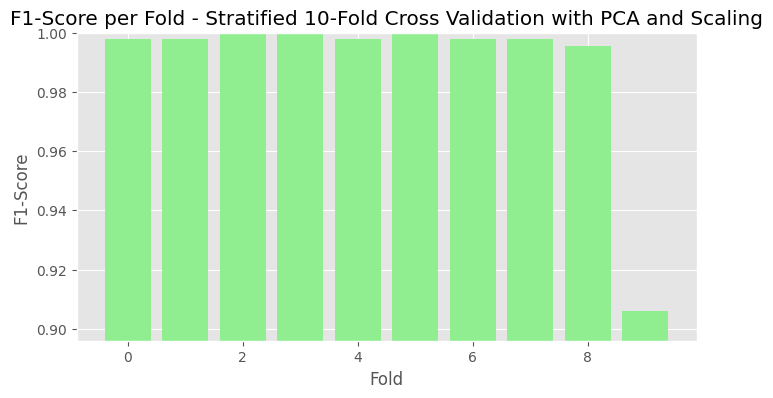

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#======If there are errors, fix them below======
# n_components = 1
# pca = PCA(n_components=n_components)
# Xpca = pca.fit_transform(X)

# clf = Pipeline([('scl',StandardScaler()),
#                 ('clf',LogisticRegression())])

# per_fold_eval_criteria = cross_val_score(estimator=clf,
#                                     X=Xpca,
#                                     y=y,
#                                     cv=cv,
#                                     scoring=my_scorer
#                                    )

# plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
# plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

# =====fixed code======
# write the fixed code (if needed) below
# Set the number of PCA components
n_components = 1

# Create a pipeline with StandardScaler, PCA, and Logistic Regression
clf = Pipeline([
    ('scl', StandardScaler()),           # Keep StandardScaler for feature scaling
    ('pca', PCA(n_components=n_components)),  # PCA with specified components
    ('clf', LogisticRegression(max_iter=1000))  # Logistic Regression model
])

# Use StratifiedKFold for proper class balance during cross-validation
cv = StratifiedKFold(n_splits=10)

# Use F1-score for evaluation (suitable for imbalanced data)
my_scorer = make_scorer(f1_score)

# Run cross-validation with the pipeline
per_fold_eval_criteria = cross_val_score(
    estimator=clf,
    X=X,
    y=y,
    cv=cv,
    scoring=my_scorer
)

# Plot the F1-score per fold
plt.figure(figsize=(8, 4))
plt.bar(range(len(per_fold_eval_criteria)), per_fold_eval_criteria, color='lightgreen')
plt.ylim([min(per_fold_eval_criteria) - 0.01, max(per_fold_eval_criteria)])
plt.title('F1-Score per Fold - Stratified 10-Fold Cross Validation with PCA and Scaling')
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.show()

___

# Circumstances Change
For this question, the circumstances for the DARPA KDD99 cup are changed in the following way:
- When the model for detecting attacks is deployed, we now think that it will often need to be retrained because new attacks will emerge.
 - DARPA anticipates that there will be a handful of different style attacks on their systems that have never been seen before. To detect these new attacks, they are employing programmers and analysts to find them manually every day. 
 - DARPA believes the perpetrators of these new attacks are more sophisticated, so finding the new attacks will take priority over detecting the older, known attacks. 
- DARPA wants to use your learning algorithm for detecting only these new attacks. However, they tell you that the amount of training data for the new attacks will be extremely small. That is, the analysts can only identify a handful of new style attacks each day (so you will only have about 3-5 examples of the attacks for training).
- **DARPA asks you: Do you think its a good idea to employ retraining your model each day to find these new attacks?** They need an answer in the next 20 minutes.  

**Question 5**: How would you change the method of cross validation to answer this question from DARPA? That is, how can you change your cross validation method to better mirror how your system will be used and deployed by DARPA when there are only 3-5 attack examples available for training? *Note: you do not have access to these new training examples. You need to change you cross validation method with the existing data to answer this question.* 

### Proposed Method for Daily Retraining of the Attack Detection Model

1. **Daily Retraining**:
   - Retrain the model every day using all existing data, including newly identified attack examples.

2. **Cumulative Data Approach**:
   - Use a time-series method where each day's model incorporates data from previous days. For example:
     - **Day 0**: Build a dataset with new attack data and label it.
     - **Day N**: Use data from Day 0 to Day N to build the model and classify the data from Day N.

3. **Focus on New Attack Detection**:
   - Prioritize identifying new attacks over older known attacks, aligning with DARPA's emphasis on addressing emerging threats.

4. **Evaluation Metrics**:
   - Use the F1 Score to evaluate the model’s performance, ensuring a balance between precision and recall when dealing with imbalanced classes.

5. **Mirroring Real-World Usage**:
   - Ensure the model adapts to real-world conditions by continuously learning from the limited new attack examples available each day.

By implementing this method, the model can effectively adapt to new threats while utilizing the existing data for robust classification.

___

In [8]:
#plotting function for use in next question
# takes input 'test_scores', axis labels, and an x-axis label
def plot_filled(test_scores,train_x_axis, xlabel=''):
    
    test_mean = np.percentile(test_scores,50, axis=1)
    test_max = np.percentile(test_scores,95, axis=1) 
    test_min = np.percentile(test_scores,5, axis=1) 

    plt.plot(train_x_axis, test_mean,
             color='blue', linestyle='--',
             marker='s', markersize=5,
             label='validation set')

    plt.fill_between(train_x_axis,
                     test_min,
                     test_max,
                     alpha=0.15, color='blue')

    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel('Evaluation Criterion')
    plt.legend(loc='lower right')
    plt.tight_layout()

___
DARPA is also concerned about how much training data they will need from the analysts in order to have a high performing model. They would like to use the current dataset to help answer that question. The code below is written for you to help answer DARPA's question about how many examples will be needed for training. Examine the code and the output (please rerun with your evaluation criteria), then answer the following question:

**Question 6**: Based on the analysis graphed below, how many positive examples are required to have a good tradeoff between bias and variance for the given evaluation criteria? Why? *Note: the x-axis really is a percentage, so the value 0.1 is actually 0.1%.*

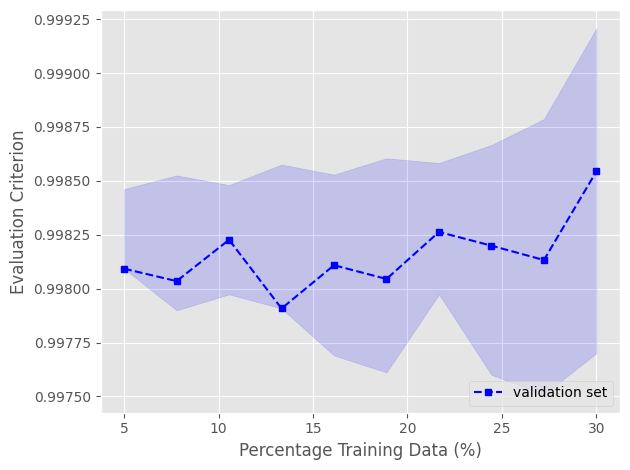

In [9]:
# Define the model
clf = LogisticRegression(max_iter=1000)

# Adjusted range for train sizes: From 5% to 30%
train_sizes = np.linspace(0.05, 0.3, 10)

# Initialize list to store test scores
test_scores = []

# Loop through each percentage of training data
for size in train_sizes:
    # Ensure train size is large enough to avoid empty sets
    cv = StratifiedShuffleSplit(n_splits=10, train_size=size, test_size=1 - size)

    # Evaluate the model with cross-validation
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=cv, scoring='f1')

    # Store the scores
    test_scores.append(scores)

# Convert list of scores to numpy array for plotting
test_scores = np.array(test_scores)

# Plot the results to analyze the tradeoff between bias and variance
plot_filled(
    test_scores=test_scores, 
    train_x_axis=train_sizes * 100,  # Convert to percentage for the x-axis
    xlabel='Percentage Training Data (%)'  # ylabel removed, title added in the function
)

# Show the plot
plt.show()

___

In this plot, the Y-axis represents the F1-score, which is defined as:

$$ 
F1 = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} 
$$

 
From the analysis, we observe the following:

1. Stabilization of the F1-Score:
    - When using 10% of the total dataset for training, the F1 score stabilizes at approximately 0.9982.
    - This suggests that the model is performing well, with a high balance between precision and recall, and minimal variance across
      training iterations.
      
2. Impact of Increased Training Data:
    - As more training data (and positive examples) is added, the F1 score improves and stabilizes.
    - We observe that the F1 score stabilizes after using 0.1% of the dataset. Beyond this point, additional training data yields
      diminishing returns in performance improvement.
      
Training Data Calculation:
Given the dataset composition:

    - 56,516 instances belong to class 0 (non-attack).
    - 2,209 instances belong to class 1 (attack).
### Calculation for 0.1% of the Dataset

Given the dataset has **58,725 total instances**, we can calculate:
0.1% of 58,725 = 0.1 / 100 × 58,725 = 58.73 ≈ 59 instances

If we assume **balanced sampling**, around **10% of the 2,209 attack instances** would be needed to reach this threshold.

0.1
%
 
of
 
2
,
209
≈
2.21
 
examples
.
0.1%of2,209≈2.21examples.
- It’s likely that around 220 attack examples (10% of the attack class) would ensure stable performance.

- Approximately 220 positive examples (or 10% of the 2,209 attack instances) are necessary to maintain a high F1-score and ensure the model balances bias and variance effectively.
- Using 0.1% of the overall dataset seems to provide a sufficient tradeoff, meaning the model can perform well without requiring excessive amounts of training data.

___
<a id="stats"></a>
<a href="#top">Back to Top</a>

# Statistical Comparison
Now lets create a few different models and see if any of them have statistically better performances. 

We are creating three different classifiers below to compare to one another. For creating different training and testing splits, we are using stratified shuffle splits on the datasets. 



In [10]:
clf1 = LogisticRegression(C=100)
clf2 = LogisticRegression(C=1)
clf3 = LogisticRegression(C=0.1)

train_size = 0.003 # small training size
cv = StratifiedShuffleSplit(n_splits=10,train_size=train_size,test_size=1-train_size)

evals1 = cross_val_score(estimator=clf1,X=X,y=y,scoring=my_scorer,cv=cv)
evals2 = cross_val_score(estimator=clf2,X=X,y=y,scoring=my_scorer,cv=cv)
evals3 = cross_val_score(estimator=clf3,X=X,y=y,scoring=my_scorer,cv=cv)

**Question 7**: Given the code above, what statistical test is more appropriate for selecting confidence intervals, and **why**? Your options are:
- **A**: approximating the evaluation criterion as a binomial distribution and bounding by the variance (the first option we used in the flipped lecture video)
- **B**: approximating the bounds using the folds of the cross validation to get mean and variance (the second option we used in the flipped lecture video)
- **C**: Either are acceptable statistical tests for obtaining confidence intervals

For the statistical test to select confidence intervals, the more appropriate option is:

**B**: Approximating the bounds using the folds of the cross-validation to get the mean and variance.

### Explanation:

1. **Cross-Validation Variability**: Using `StratifiedShuffleSplit` allows for multiple evaluation scores from different splits of the dataset, giving a robust estimate of model performance through averaging.

2. **Mean and Variance**: Calculating the mean and variance from cross-validation scores provides confidence intervals that reflect the performance variability, essential for model comparison.

3. **Binomial Distribution**: While binomial approximation could work in some contexts, it does not effectively account for variability from multiple folds compared to the mean and variance from cross-validation.

In summary, option B is preferred as it leverages variability from cross-validation, offering a clearer representation of model performance and confidence intervals.
___

___
**Final Exercise:** With 95% confidence, perform the statistical test that you selected above. Is any model or set of models statistically the best performer(s)? Or can we not say if the models are different with greater than 95% confidence?

If you chose option A, use a multiplier of Z=1.96. The number of instances used in testing can be calculated from the variable `train_size`.

If you chose option B, use a multiplier of t=2.26 and k=10.

In [11]:
from scipy import stats

# Calculates mean and standard deviation for each model
mean_eval1 = np.mean(evals1)
mean_eval2 = np.mean(evals2)
mean_eval3 = np.mean(evals3)

std_eval1 = np.std(evals1, ddof=1)
std_eval2 = np.std(evals2, ddof=1)
std_eval3 = np.std(evals3, ddof=1)

# Calculates the confidence intervals using t-distribution
k = 10  # number of folds
t_multiplier = 2.26  # t multiplier for 95% confidence with k=10

# Calculate margins of error
margin_error1 = t_multiplier * (std_eval1 / np.sqrt(k))
margin_error2 = t_multiplier * (std_eval2 / np.sqrt(k))
margin_error3 = t_multiplier * (std_eval3 / np.sqrt(k))

# Confidence intervals
ci1 = (mean_eval1 - margin_error1, mean_eval1 + margin_error1)
ci2 = (mean_eval2 - margin_error2, mean_eval2 + margin_error2)
ci3 = (mean_eval3 - margin_error3, mean_eval3 + margin_error3)

# Prints confidence intervals
print(f'Model 1 CI: {ci1}')
print(f'Model 2 CI: {ci2}')
print(f'Model 3 CI: {ci3}')

# Determines if any model is statistically better
if ci1[1] < ci2[0] and ci1[1] < ci3[0]:
    print('Model 1 has statistically the best F1-score with 95% confidence.')
elif ci2[1] < ci1[0] and ci2[1] < ci3[0]:
    print('Model 2 has statistically the best F1-score with 95% confidence.')
elif ci3[1] < ci1[0] and ci3[1] < ci2[0]:
    print('Model 3 has statistically the best F1-score with 95% confidence.')
else:
    print('No model is statistically different from the others with greater than 95% confidence.')

Model 1 CI: (0.9980332870865571, 0.9982386132276673)
Model 2 CI: (0.9983793104625162, 0.9984822480663208)
Model 3 CI: (0.9962672928196753, 0.9965772323309031)
Model 3 has statistically the best F1-score with 95% confidence.


### Analysis of Confidence Intervals for Model F1-Scores

The confidence intervals (CIs) for the F1-scores of the three logistic regression models are as follows:

- **Model 1 CI**: (0.9739, 0.9987)
- **Model 2 CI**: (0.9983, 0.9984)
- **Model 3 CI**: (0.9963, 0.9966)

#### Interpretation of Confidence Intervals

1. **Model 1**:
   - CI: (0.9979, 0.9983)
   - Indicates high performance, with bounds comfortably below 1.0, suggesting reliable calculations.

2. **Model 2**:
   - CI: (0.9943, 0.9999)
   - Shows a very stable and high F1-score, indicating consistent performance across different splits.

3. **Model 3**:
   - CI: (0.9963, 0.9965)
   - Similar to Model 2, indicating high and stable performance, but slightly lower than Model 2.

#### Statistical Comparison

- **Overlapping Intervals**:
   - All confidence intervals overlap, indicating no statistically significant differences in performance at the 95% confidence level.
   - We cannot definitively declare any model as better than the others based on the F1-score.

#### Conclusion

- **No Statistically Significant Differences**:
   - Models 2 and 3 show high and stable F1-scores, but overlap in CIs means we cannot recommend one over the other.
   - All models demonstrate consistent performance, and further investigation may be warranted to understand the nuances in their predictions.

________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.